<a href="https://colab.research.google.com/github/RoyMukta/Data-Science-Research-Project-Part-B/blob/main/Baseline_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define your project folder path
project_path = "/content/drive/My Drive/Project"

In [ ]:
# ===============================================================
# STEP 1 — Load data and libraries
# ===============================================================
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your GoEmotions output file (update path if needed)
#df = pd.read_csv("/content/drive/MyDrive/Project/Mental_health_Emotion_features.csv"
df = pd.read_csv("/content/drive/My Drive/Project/Mental_health_Emotion_features.csv")

print("✅ Data loaded successfully")
print("Columns:", list(df.columns))
print(df.head())


✅ Data loaded successfully
Columns: ['Post ID', 'Post Title', 'Post Content', 'Post Author', 'User ID', 'Post Date', 'Post Category', 'positive_emotion', 'negative_emotion', 'anxiety', 'first_person', 'social', 'cognitive', 'biological', 'suicidal_terms', 'Top_Emotions', 'Dominant_Emotion', 'Emotion_Confidence']
   Post ID                                         Post Title  \
0   607679  Hi Check out this post if youre not sure how t...   
1   180185                               I had a car accident   
2   516409                                      Horrible week   
3   605332                           New relationship anxiety   
4   610948                        Persistent constant anxiety   

                                        Post Content   Post Author  User ID  \
0  Hi there and welcome to the Anxiety section of...    BeyondBlue    54597   
1  And it was entirely my own fault I tried cross...         grovi    12724   
2  Hi everyone Im having a horrible week so just ...  What

In [ ]:
import pandas as pd
from IPython.display import display, HTML
# Display first 10 rows as a scrollable table
display(HTML(df.head(5).to_html(index=False)))


Post ID,Post Title,Post Content,Post Author,User ID,Post Date,Post Category,positive_emotion,negative_emotion,anxiety,first_person,social,cognitive,biological,suicidal_terms,Top_Emotions,Dominant_Emotion,Emotion_Confidence
607679,Hi Check out this post if youre not sure how to start,Hi there and welcome to the Anxiety section of the Forums First of all thank you so much for joining us here We think it s amazing that you ve taken this step to getting support and learning from this Community You are very welcome here and we are really interested in what you might want to add to these conversations We get it having anxiety makes it hard to share in a public place Remember this is anonymous and the Beyond Blue team are here to help if you need it This section is for people who are experiencing anxiety in some form in their lives This might be in social settings at work or just in the day to day You don t need a diagnosis to post here If it feels like the right spot for your post go right ahead We know that feeling anxious can make it hard to reach out so we want you to know that getting this far is amazing and a great start A few tips for getting the most out of this section Get involved when you can Posting and replying is the heartbeat of this community and you DO have something worthwhile to share when you re ready Every experience is different There is no competition here We know how challenging anxiety can be and how it comes in all shapes and sizes What you are experiencing will be respected and supported here Trust yourself You are the expert in your experience This community works because people like you share what has worked for you Thank you for getting involved and taking a look We can t wait to hear from you Beyond Blue,BeyondBlue,54597,3/4/2025,Anxiety,0.003509,0.0,0.003509,0.000000,0.024561,0.017544,0.000000,0.000000,"[('gratitude', 0.9443348050117493), ('admiration', 0.02417544089257717), ('approval', 0.006728984881192446)]",gratitude,0.944335
180185,I had a car accident,And it was entirely my own fault I tried crossing two lanes of traffic on a street that Ive done it a million times before It was really busy and a guy opened up a gap for me I was so focussed on missing an accident in those later lanes that i forgot for an instant to double check the closest ones which seemed completely clear Noone was hurt and there was only really minor damage to the cars I just didnt see him The insurance has accepted all claims but Im still so wrecked with guilt over the situation Im so ashamed that I cant bring myself to tell anyone Im so scared to get back in the car because Im paranoid that Ill miss something somehow And Im so scared that this is going to become one of those things that just stays with me for years and years to come I have had major issues with guilt shame anxiety in the past Its partially the lack of personal concequence thats really messing with me Everything ended so neatly and almost too well I am thankful for this but at the same time I feel as though I should have been fined punished somehow On the one hand I feel as though I deserve to have this anxiety but I dont know how to stop feeling this way and I really dont think I can handle dwelling on this kind of shame again for as long as I did last time,grovi,12724,5/21/2016,Anxiety,0.000000,0.0,0.000000,0.079051,0.000000,0.007905,0.000000,0.000000,"[('fear', 0.5783167481422424), ('nervousness', 0.11716724932193756), ('sadness', 0.06484058499336243)]",fear,0.578317
516409,Horrible week,Hi everyone Im having a horrible week so just thought I would post to see how everyone else is going Im having a hard time getting out of the shame spiral this week but trying to remember this is only temporary Anyway hope others are well happy to chat about anything,Whatsinaname,7809,9/25/2020,Anxiety,0.019608,0.0,0.000000,0.019608,0.000000,0.019608,0.000000,0.000000,"[('fear', 0.27033746242523193), ('optimism', 0.22630715370178223), ('nervousness', 0.14237412810325623)]"

/tmp/ipython-input-483160250.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="coolwarm")


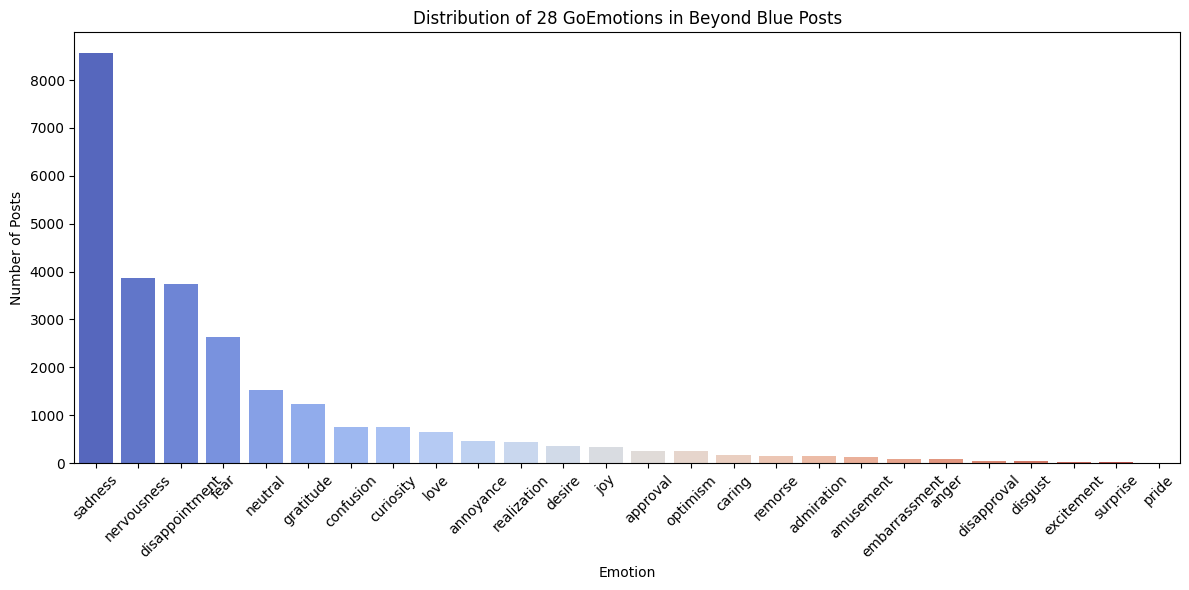

Top 10 emotions:
Dominant_Emotion
sadness           8567
nervousness       3873
disappointment    3737
fear              2644
neutral           1517
gratitude         1239
confusion          763
curiosity          750
love               643
annoyance          456
Name: count, dtype: int64


In [ ]:
# ===============================================================
# STEP 2 — Explore full 28 GoEmotions labels
# ===============================================================
plt.figure(figsize=(12,6))
emotion_counts = df["Dominant_Emotion"].value_counts().sort_values(ascending=False)
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="coolwarm")
plt.title("Distribution of 28 GoEmotions in Beyond Blue Posts")
plt.ylabel("Number of Posts")
plt.xlabel("Emotion")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional: show top 10 emotions
print("Top 10 emotions:")
print(emotion_counts.head(10))


In [ ]:
# ===============================================================
# STEP 3 — Define mappings based on psychology and GoEmotions taxonomy
# ===============================================================

depression_emotions = ["sadness","grief","disappointment","remorse","disapproval","disgust"]
anxiety_emotions    = ["fear","nervousness","worry","confusion","anger","annoyance"]
suicidal_emotions   = ["despair","guilt","hopelessness","fear","grief","sadness"]
positive_emotions   = ["admiration","amusement","approval","caring","curiosity","desire",
                       "excitement","gratitude","joy","love","optimism","pride","relief"]
neutral_emotions    = ["neutral","realization","surprise"]

def map_emotion_to_risk(emotion):
    e = str(emotion).lower().strip()
    if e in depression_emotions:
        return "Depression"
    elif e in anxiety_emotions:
        return "Anxiety"
    elif e in suicidal_emotions:
        return "Suicidal"
    elif e in positive_emotions:
        return "Positive"
    elif e in neutral_emotions:
        return "Neutral"
    else:
        return "Neutral"

# Apply mapping
df["Mental_Health_Risk"] = df["Dominant_Emotion"].apply(map_emotion_to_risk)
print("✅ Mapping complete!")
print(df[["Dominant_Emotion","Mental_Health_Risk"]].head(10))


✅ Mapping complete!
  Dominant_Emotion Mental_Health_Risk
0        gratitude           Positive
1             fear            Anxiety
2             fear            Anxiety
3           desire           Positive
4      nervousness            Anxiety
5      nervousness            Anxiety
6        curiosity           Positive
7   disappointment         Depression
8   disappointment         Depression
9      nervousness            Anxiety


/tmp/ipython-input-4254614912.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Mental_Health_Risk",


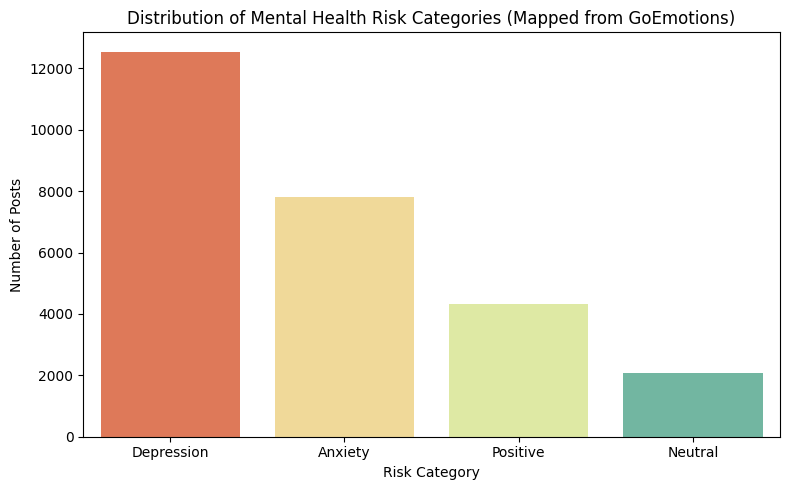

Percentage Distribution of Risk Categories (%)
 Mental_Health_Risk
Depression    46.9
Anxiety       29.2
Positive      16.2
Neutral        7.7
Name: proportion, dtype: float64


In [ ]:
# ===============================================================
# STEP 4 — Visualise distribution of 5 risk groups
# ===============================================================
plt.figure(figsize=(8,5))
sns.countplot(x="Mental_Health_Risk",
              data=df,
              order=df["Mental_Health_Risk"].value_counts().index,
              palette="Spectral")
plt.title("Distribution of Mental Health Risk Categories (Mapped from GoEmotions)")
plt.xlabel("Risk Category")
plt.ylabel("Number of Posts")
plt.tight_layout()
plt.show()

# Optional: % distribution
risk_pct = (df["Mental_Health_Risk"].value_counts(normalize=True)*100).round(1)
print("Percentage Distribution of Risk Categories (%)\n", risk_pct)


Mental_Health_Risk             Anxiety  Depression  Neutral  Positive
Post Category                                                        
Anxiety                           58.9        20.7      4.0      16.4
Depression                        18.7        63.7      5.0      12.7
PTSD & Trauma                     26.8        50.6      8.5      14.2
Relationship & Family Issues      15.2        59.7     10.7      14.3
Staying Well                      11.3        25.9     21.5      41.3
Suicidal Thoughts & Self-harm     21.4        60.9      5.6      12.1


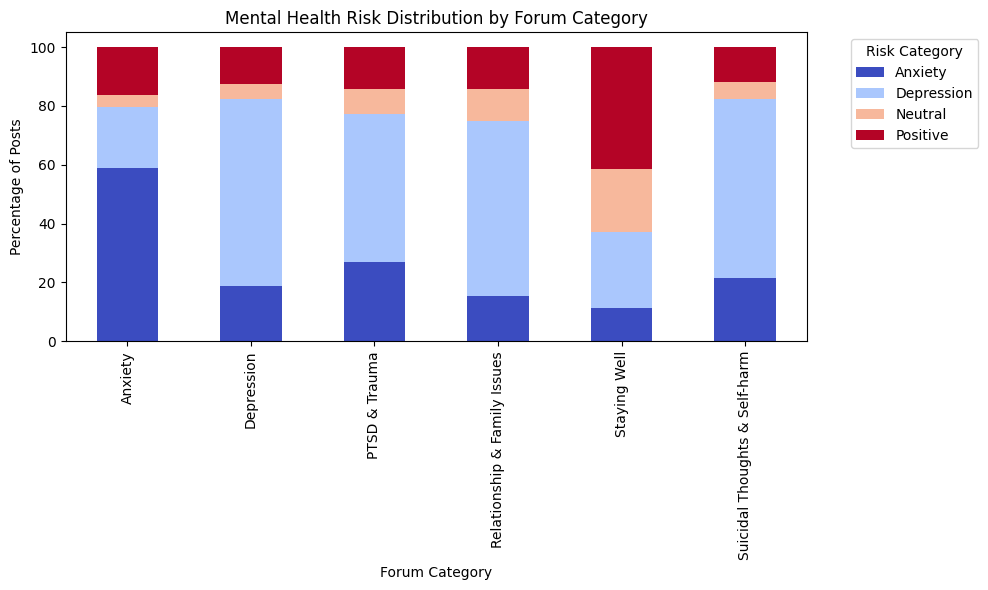

In [ ]:
# ===============================================================
# STEP 5 — Cross-category analysis
# ===============================================================
if "Post Category" in df.columns:
    cross_tab = pd.crosstab(df["Post Category"],
                            df["Mental_Health_Risk"],
                            normalize='index') * 100
    print(cross_tab.round(1))

    cross_tab.plot(kind="bar", stacked=True, figsize=(10,6), colormap="coolwarm")
    plt.title("Mental Health Risk Distribution by Forum Category")
    plt.ylabel("Percentage of Posts")
    plt.xlabel("Forum Category")
    plt.legend(title="Risk Category", bbox_to_anchor=(1.05,1), loc="upper left")
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No 'Post Category' column found — skipping cross-forum comparison.")


In [ ]:
# ===============================================================
# STEP 6 — Save output for modelling / report
# ===============================================================
save_path = "/content/drive/MyDrive/Project/Mental_health_GoEmotion_Mapped.csv"
df.to_csv(save_path, index=False)
print(f"💾 File saved to: {save_path}")


💾 File saved to: /content/drive/MyDrive/Project/Mental_health_GoEmotion_Mapped.csv


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/Project/Mental_health_Emotion_features.csv")

print("✅ Data loaded successfully with shape:", df.shape)
print(df.columns)


✅ Data loaded successfully with shape: (26749, 18)
Index(['Post ID', 'Post Title', 'Post Content', 'Post Author', 'User ID',
       'Post Date', 'Post Category', 'positive_emotion', 'negative_emotion',
       'anxiety', 'first_person', 'social', 'cognitive', 'biological',
       'suicidal_terms', 'Top_Emotions', 'Dominant_Emotion',
       'Emotion_Confidence'],
      dtype='object')


In [ ]:
# Emotion-level indicators for suicidal distress (from GoEmotions)
suicidal_emotions = [
    "fear", "grief", "sadness", "remorse", "disgust",
    "disappointment", "nervousness"
]

# 🔹 Suicide-related keywords and phrases (expanded list)
suicidal_keywords = [
    # Direct expressions
    "suicide", "end my life", "end it all", "kill myself", "take my life",
    "die", "want to die", "wish i were dead", "can't go on", "no reason to live",
    "life not worth living", "tired of living", "don't want to live", "give up on life",

    # Self-harm indicators
    "self harm", "cut myself", "hurt myself", "bleed", "slit my wrist",
    "pills", "overdose", "jump off", "hang myself",

    # Hopelessness / worthlessness cues
    "hopeless", "worthless", "pointless", "useless", "nothing matters",
    "no hope", "can't be saved", "nobody cares", "better off dead",
    "tired of everything", "done with life"
]


In [ ]:
import re

# Check for suicidal phrases in text
def contains_suicidal_keywords(text):
    text = str(text).lower()
    for phrase in suicidal_keywords:
        if phrase in text:
            return True
    return False

# Combine emotion, lexicon, and keyword signals
def detect_suicidal(row):
    # 1️⃣ Lexicon-based signal (LIWC column)
    lexicon_flag = row.get("suicidal_terms", 0) > 0

    # 2️⃣ Emotion-based signal
    emotion_flag = row.get("Dominant_Emotion", "").lower() in suicidal_emotions

    # 3️⃣ Keyword-based signal
    keyword_flag = contains_suicidal_keywords(row.get("Post Content", ""))

    # Combine all signals
    if lexicon_flag or emotion_flag or keyword_flag:
        return 1  # suicidal
    else:
        return 0  # non-suicidal


In [ ]:
# Apply detection logic
df["Suicidal_Flag"] = df.apply(detect_suicidal, axis=1)

# Summary of results
print("✅ Suicidal post detection complete!")
print(df["Suicidal_Flag"].value_counts())
print("📊 Percentage suicidal posts:", (df["Suicidal_Flag"].mean() * 100).round(2), "%")

# Save updated dataset
df.to_csv("/content/drive/My Drive/Project/Mental_health_Suicidal_Identified.csv", index=False)
print("💾 Saved to Drive: Mental_health_Suicidal_Identified.csv")


✅ Suicidal post detection complete!
Suicidal_Flag
1    20817
0     5932
Name: count, dtype: int64
📊 Percentage suicidal posts: 77.82 %
💾 Saved to Drive: Mental_health_Suicidal_Identified.csv


/tmp/ipython-input-980864340.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Suicidal_Flag", data=df, palette="coolwarm")


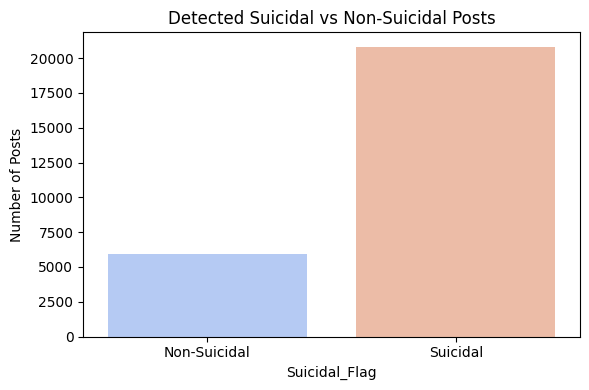

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x="Suicidal_Flag", data=df, palette="coolwarm")
plt.title("Detected Suicidal vs Non-Suicidal Posts")
plt.xticks([0,1], ["Non-Suicidal", "Suicidal"])
plt.ylabel("Number of Posts")
plt.tight_layout()
plt.show()


                               Non-Suicidal (%)  Suicidal (%)
Post Category                                                
Anxiety                                   20.47         79.53
Depression                                17.66         82.34
PTSD & Trauma                             22.04         77.96
Relationship & Family Issues              22.78         77.22
Staying Well                              51.85         48.15
Suicidal Thoughts & Self-harm             11.52         88.48


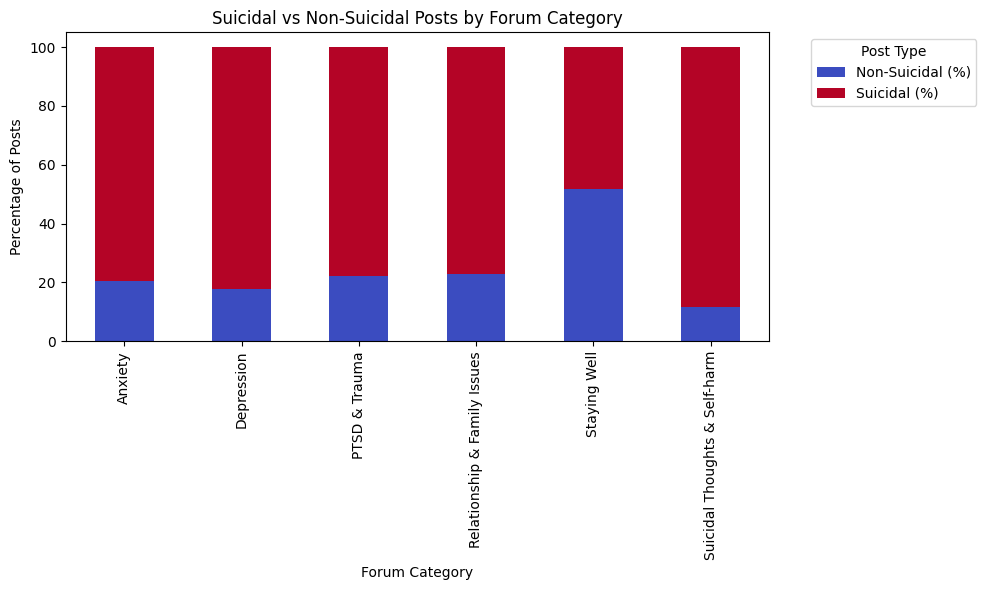

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cross-tab of suicidal vs forum category
if "Post Category" in df.columns:
    cross_tab = pd.crosstab(df["Post Category"], df["Suicidal_Flag"], normalize='index') * 100
    cross_tab.columns = ["Non-Suicidal (%)", "Suicidal (%)"]
    print(cross_tab.round(2))

    # Stacked bar plot
    cross_tab.plot(kind="bar", stacked=True, figsize=(10,6), colormap="coolwarm")
    plt.title("Suicidal vs Non-Suicidal Posts by Forum Category")
    plt.ylabel("Percentage of Posts")
    plt.xlabel("Forum Category")
    plt.legend(title="Post Type", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ 'Post Category' column not found – cannot compute category-wise distribution.")


In [ ]:
import pandas as pd
import re

# Load your dataset
df = pd.read_csv("/content/drive/My Drive/Project/Mental_health_Emotion_features.csv")

# Suicide-related keywords (as you already defined)
suicidal_keywords = [
    "suicide", "end my life", "end it all", "kill myself", "take my life",
    "want to die", "wish i were dead", "can't go on", "no reason to live",
    "life not worth living", "tired of living", "don't want to live", "give up on life",
    "self harm", "cut myself", "hurt myself", "bleed", "slit my wrist",
    "pills", "overdose", "jump off", "hang myself",
    "hopeless", "worthless", "better off dead", "done with life"
]

def contains_suicidal_keywords(text):
    text = str(text).lower()
    for phrase in suicidal_keywords:
        if phrase in text:
            return True
    return False

def detect_suicidal_refined(row):
    emotion = str(row.get("Dominant_Emotion", "")).lower()
    text = str(row.get("Post Content", "")).lower()
    liwc_score = row.get("suicidal_terms", 0)

    # 1️⃣ explicit keyword = definitely suicidal
    if contains_suicidal_keywords(text):
        return 1

    # 2️⃣ lexicon score high enough
    elif liwc_score > 0.2:     # you can adjust this threshold
        return 1

    # 3️⃣ combination of high-risk emotion + LIWC
    elif emotion in ["fear", "sadness", "grief", "remorse", "disgust"] and liwc_score > 0:
        return 1

    # otherwise non-suicidal
    else:
        return 0

df["Suicidal_Flag"] = df.apply(detect_suicidal_refined, axis=1)
print(df["Suicidal_Flag"].value_counts())
print("Percentage suicidal posts:", round(df["Suicidal_Flag"].mean()*100, 2), "%")


Suicidal_Flag
0    21813
1     4936
Name: count, dtype: int64
Percentage suicidal posts: 18.45 %


In [ ]:
# ===============================================================
# STEP — Save suicidal detection results to Drive
# ===============================================================

save_path = "/content/drive/My Drive/Project/Mental_health_Suicidal_update.csv"
df.to_csv(save_path, index=False)
print(f"💾 File saved successfully to: {save_path}")


💾 File saved successfully to: /content/drive/My Drive/Project/Mental_health_Suicidal_update.csv


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your saved dataset
df = pd.read_csv("/content/drive/My Drive/Project/Mental_health_Suicidal_update.csv")

# Basic check
print(df.shape)
print(df["Suicidal_Flag"].value_counts())

# Define text & label
X = df["Post Content"].astype(str)
y = df["Suicidal_Flag"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("✅ Data split complete")


(26749, 19)
Suicidal_Flag
0    21813
1     4936
Name: count, dtype: int64
✅ Data split complete


📊 Logistic Regression (TF-IDF) Performance
              precision    recall  f1-score   support

           0      0.961     0.927     0.944      4363
           1      0.722     0.835     0.774       987

    accuracy                          0.910      5350
   macro avg      0.841     0.881     0.859      5350
weighted avg      0.917     0.910     0.913      5350



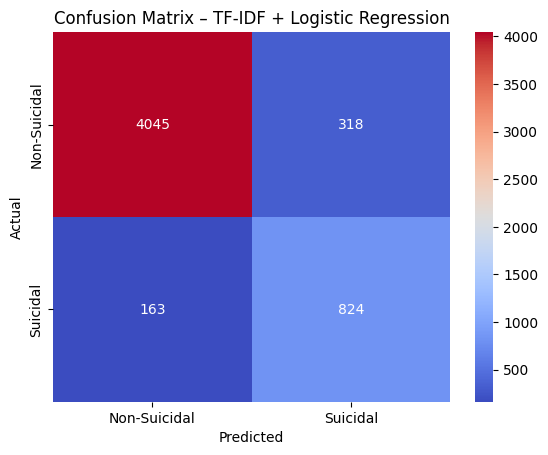

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2), stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Logistic Regression
lr = LogisticRegression(max_iter=200, class_weight="balanced", solver='liblinear')
lr.fit(X_train_tfidf, y_train)
y_pred_lr = lr.predict(X_test_tfidf)

# Evaluation
print("📊 Logistic Regression (TF-IDF) Performance")
print(classification_report(y_test, y_pred_lr, digits=3))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Non-Suicidal","Suicidal"], yticklabels=["Non-Suicidal","Suicidal"])
plt.title("Confusion Matrix – TF-IDF + Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
import pandas as pd

# Load both files
df_emotion = pd.read_csv("/content/drive/My Drive/Project/Mental_health_GoEmotion_Mapped.csv")
df_suicidal = pd.read_csv("/content/drive/My Drive/Project/Mental_health_Suicidal_update.csv")

print("GoEmotion file:", df_emotion.shape)
print("Suicidal file:", df_suicidal.shape)

# Merge on common key (Post ID or Post Content)
# If same posts, merge on 'Post ID'
df = pd.merge(df_emotion, df_suicidal, on="Post ID", how="inner")

print("✅ Merged dataset:", df.shape)


GoEmotion file: (26749, 19)
Suicidal file: (26749, 19)
✅ Merged dataset: (26749, 37)


In [ ]:
# ✅ Define save path
save_path = "/content/drive/My Drive/Project/Mental_health_Merged.csv"

# ✅ Save file to Drive
df.to_csv(save_path, index=False, encoding="utf-8")
print(f"💾 Merged dataset saved successfully to: {save_path}")


💾 Merged dataset saved successfully to: /content/drive/My Drive/Project/Mental_health_Merged.csv


In [ ]:
print("🧾 Columns in merged dataset:\n")
for i, col in enumerate(df.columns.tolist(), 1):
    print(f"{i}. {col}")


🧾 Columns in merged dataset:

1. Post ID
2. Post Title_x
3. Post Content_x
4. Post Author_x
5. User ID_x
6. Post Date_x
7. Post Category_x
8. positive_emotion_x
9. negative_emotion_x
10. anxiety_x
11. first_person_x
12. social_x
13. cognitive_x
14. biological_x
15. suicidal_terms_x
16. Top_Emotions_x
17. Dominant_Emotion_x
18. Emotion_Confidence_x
19. Mental_Health_Risk
20. Post Title_y
21. Post Content_y
22. Post Author_y
23. User ID_y
24. Post Date_y
25. Post Category_y
26. positive_emotion_y
27. negative_emotion_y
28. anxiety_y
29. first_person_y
30. social_y
31. cognitive_y
32. biological_y
33. suicidal_terms_y
34. Top_Emotions_y
35. Dominant_Emotion_y
36. Emotion_Confidence_y
37. Suicidal_Flag


In [ ]:
def define_final_label(row):
    if row["Suicidal_Flag"] == 1:
        return "Suicidal"
    elif row["Mental_Health_Risk"] == "Depression":
        return "Depression"
    elif row["Mental_Health_Risk"] == "Anxiety":
        return "Anxiety"
    else:
        return None

df["Final_Label"] = df.apply(define_final_label, axis=1)
df = df[df["Final_Label"].notnull()]

print(df["Final_Label"].value_counts())


Final_Label
Depression    9230
Anxiety       6652
Suicidal      4936
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

X = df["Post Content_x"].astype(str)
y = df["Final_Label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("✅ Train/Test Split Done")


✅ Train/Test Split Done


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


📊 TF-IDF + Logistic Regression Results
              precision    recall  f1-score   support

     Anxiety      0.754     0.736     0.745      1331
  Depression      0.767     0.827     0.796      1846
    Suicidal      0.820     0.726     0.771       987

    accuracy                          0.774      4164
   macro avg      0.780     0.763     0.770      4164
weighted avg      0.775     0.774     0.773      4164



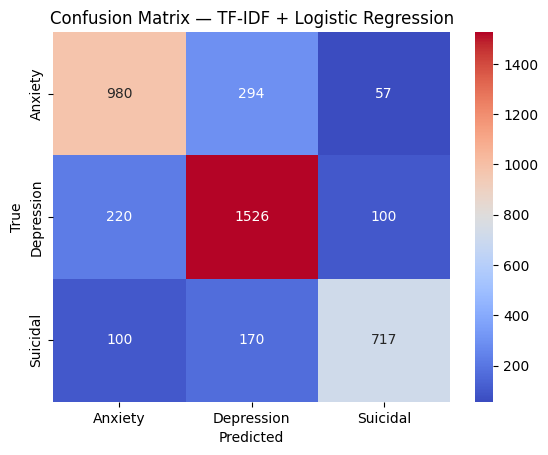

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=8000, ngram_range=(1,2), stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf  = vectorizer.transform(X_test)

# Logistic Regression
lr = LogisticRegression(max_iter=300, class_weight="balanced", multi_class="ovr")
lr.fit(X_train_tfidf, y_train)
y_pred_lr = lr.predict(X_test_tfidf)

# Evaluation
print("📊 TF-IDF + Logistic Regression Results")
print(classification_report(y_test, y_pred_lr, digits=3))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr, labels=lr.classes_)
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm",
            xticklabels=lr.classes_, yticklabels=lr.classes_)
plt.title("Confusion Matrix — TF-IDF + Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


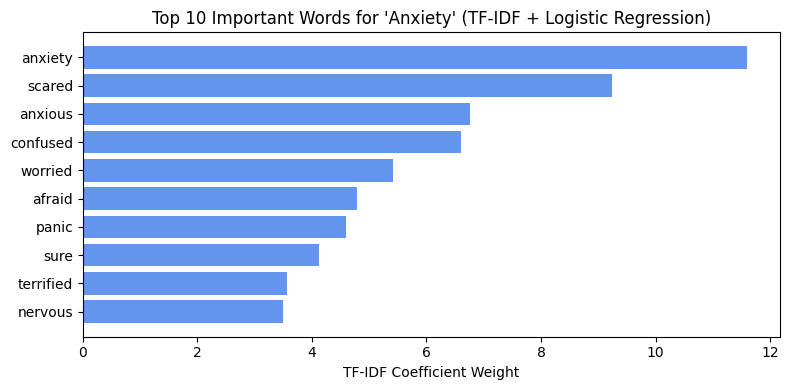

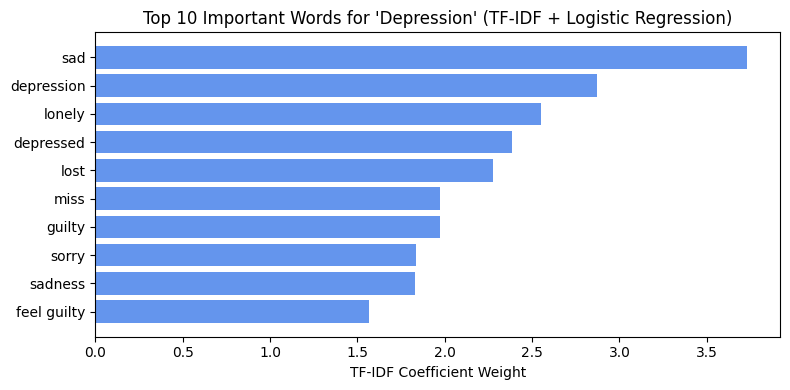

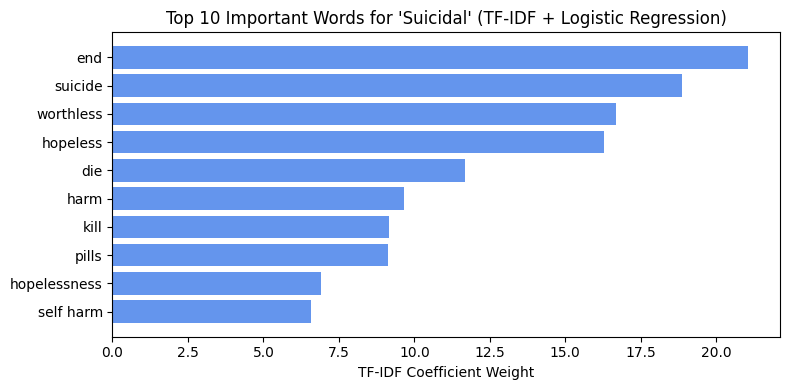

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ✅ Extract feature names from your fitted TF-IDF vectorizer
feature_names = np.array(vectorizer.get_feature_names_out())

# ✅ Number of top words to show for each class
top_n = 10

# ✅ Plot top features for each class in your trained model
for i, class_label in enumerate(lr.classes_):
    # Get coefficients for this class
    coefs = lr.coef_[i]

    # Sort and pick top-N positive coefficients
    top_indices = np.argsort(coefs)[-top_n:]

    plt.figure(figsize=(8, 4))
    plt.barh(range(top_n), coefs[top_indices], color='cornflowerblue')
    plt.yticks(range(top_n), feature_names[top_indices])
    plt.xlabel("TF-IDF Coefficient Weight")
    plt.title(f"Top {top_n} Important Words for '{class_label}' (TF-IDF + Logistic Regression)")
    plt.tight_layout()
    plt.show()


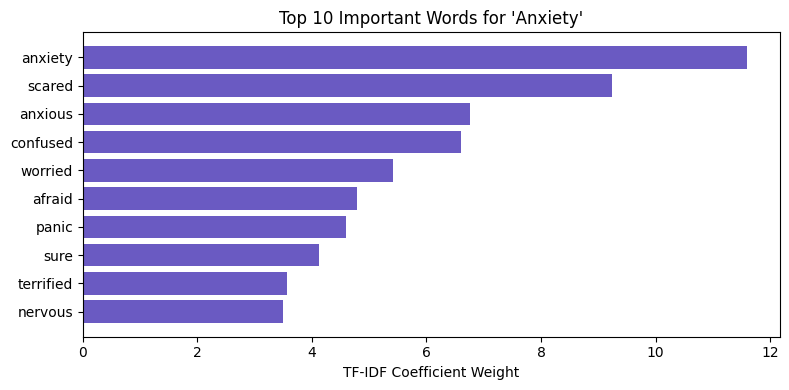

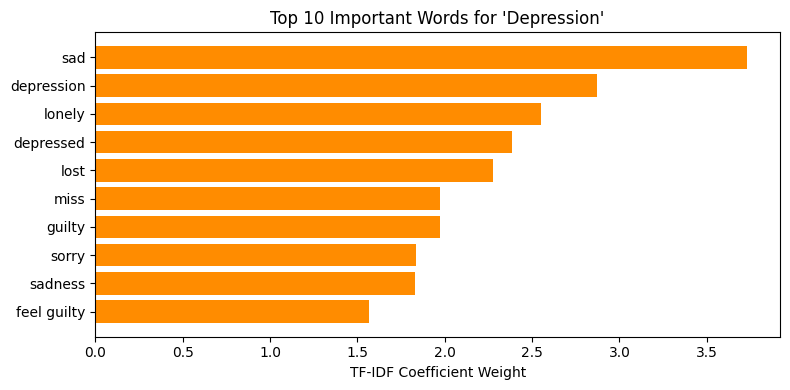

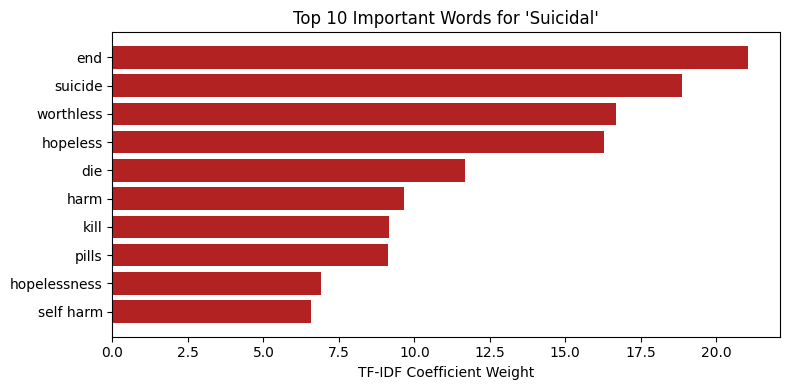

In [ ]:
colors = ['#6A5AC2', '#FF8C00', '#B22222']

for i, class_label in enumerate(lr.classes_):
    coefs = lr.coef_[i]
    top_indices = np.argsort(coefs)[-10:]

    plt.figure(figsize=(8, 4))
    plt.barh(range(10), coefs[top_indices], color=colors[i % len(colors)])
    plt.yticks(range(10), feature_names[top_indices])
    plt.xlabel("TF-IDF Coefficient Weight")
    plt.title(f"Top 10 Important Words for '{class_label}'")
    plt.tight_layout()
    plt.show()


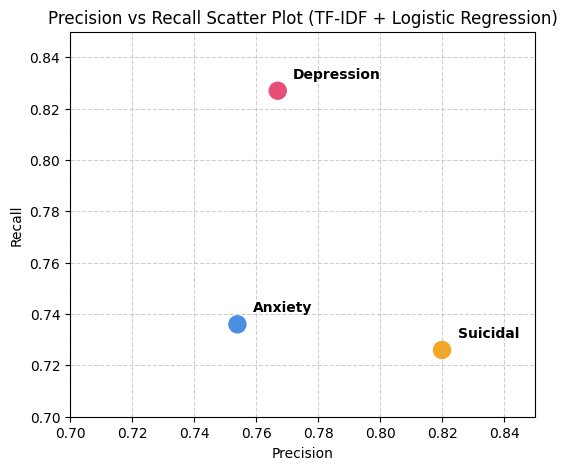

In [ ]:
import matplotlib.pyplot as plt

classes = ['Anxiety', 'Depression', 'Suicidal']
precision = [0.754, 0.767, 0.820]
recall = [0.736, 0.827, 0.726]

plt.figure(figsize=(6,5))
plt.scatter(precision, recall, s=150, color=['#4A90E2','#E94E77','#F5A623'])

for i, label in enumerate(classes):
    plt.text(precision[i]+0.005, recall[i]+0.005, label, fontsize=10, weight='bold')

plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision vs Recall Scatter Plot (TF-IDF + Logistic Regression)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(0.7, 0.85)
plt.ylim(0.7, 0.85)
plt.show()


In [ ]:
#!pip install transformers datasets torch -q
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Encode labels
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(y_train)
y_test_enc  = encoder.transform(y_test)

train_df = pd.DataFrame({"text": X_train, "labels": y_train_enc})
test_df  = pd.DataFrame({"text": X_test, "labels": y_test_enc})

train_ds = Dataset.from_pandas(train_df)
test_ds  = Dataset.from_pandas(test_df)

tokenizer = AutoTokenizer.from_pretrained("roberta-base")

def tokenize_fn(batch):
    return tokenizer(batch["text"], padding="max_length", truncation=True, max_length=256)
train_ds = train_ds.map(tokenize_fn, batched=True)
test_ds  = test_ds.map(tokenize_fn, batched=True)

train_ds = train_ds.remove_columns(["text"])
test_ds  = test_ds.remove_columns(["text"])
train_ds.set_format("torch")
test_ds.set_format("torch")

model = AutoModelForSequenceClassification.from_pretrained("roberta-base", num_labels=len(encoder.classes_))

def compute_metrics(eval_pred):
    preds, labels = eval_pred
    preds = preds.argmax(axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="macro")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    num_train_epochs=1,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    load_best_model_at_end=True,
    logging_dir="./logs",
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    compute_metrics=compute_metrics,
)

trainer.train()
metrics = trainer.evaluate()
print("📊 RoBERTa Results:", metrics)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Map:   0%|          | 0/16654 [00:00<?, ? examples/s]

Map:   0%|          | 0/4164 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


TypeError: TrainingArguments.__init__() got an unexpected keyword argument 'evaluation_strategy'

Final Roberta

In [ ]:
# ============================================================
# 🧠 Fine-tune RoBERTa for Depression, Anxiety & Suicidal Detection
# ============================================================

# 1️⃣ Install / Import dependencies
#!pip install -U transformers datasets accelerate torch -q

import os
import pandas as pd
from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    Trainer, TrainingArguments
)
from datasets import Dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Disable W&B logging to prevent API key prompt
os.environ["WANDB_DISABLED"] = "true"

# ============================================================
# 2️⃣ Load your prepared train/test data
# ============================================================

# (Assuming you already have X_train, X_test, y_train, y_test ready)
# If not, load from your merged CSV:

df = pd.read_csv("/content/drive/My Drive/Project/Mental_health_Merged.csv")

# Recreate the Final_Label column and filter the DataFrame
def define_final_label(row):
    if row["Suicidal_Flag"] == 1:
        return "Suicidal"
    elif row["Mental_Health_Risk"] == "Depression":
        return "Depression"
    elif row["Mental_Health_Risk"] == "Anxiety":
        return "Anxiety"
    else:
        return None

df["Final_Label"] = df.apply(define_final_label, axis=1)
df = df[df["Final_Label"].notnull()]


# Use correct column names for text & labels
X = df["Post Content_x"].astype(str)
y = df["Final_Label"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Encode labels
encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(y_train)
y_test_enc = encoder.transform(y_test)

# ============================================================
# 3️⃣ Convert to Hugging Face Dataset format
# ============================================================

train_df = pd.DataFrame({"text": X_train, "labels": y_train_enc})
test_df  = pd.DataFrame({"text": X_test, "labels": y_test_enc})

train_ds = Dataset.from_pandas(train_df)
test_ds  = Dataset.from_pandas(test_df)

# ============================================================
# 4️⃣ Load tokenizer & tokenize text
# ============================================================

model_name = "roberta-base"  # You can later switch to "mental/mental-bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize_fn(batch):
    return tokenizer(batch["text"], padding="max_length", truncation=True, max_length=256)

train_ds = train_ds.map(tokenize_fn, batched=True)
test_ds  = test_ds.map(tokenize_fn, batched=True)

train_ds = train_ds.remove_columns(["text"])
test_ds  = test_ds.remove_columns(["text"])
train_ds.set_format("torch")
test_ds.set_format("torch")

# ============================================================
# 5️⃣ Load model
# ============================================================

model = AutoModelForSequenceClassification.from_pretrained(
    model_name, num_labels=len(encoder.classes_)
)

# ============================================================
# 6️⃣ Define metrics
# ============================================================

def compute_metrics(eval_pred):
    preds, labels = eval_pred
    preds = preds.argmax(axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="macro")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}

# ============================================================
# 7️⃣ Training configuration
# ============================================================

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    num_train_epochs=1,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    load_best_model_at_end=True,
    logging_dir="./logs",
    report_to="none",  # disables wandb
    fp16=True,  # use GPU mixed precision for faster training
)

# ============================================================
# 8️⃣ Trainer setup & training
# ============================================================

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    compute_metrics=compute_metrics,
)

trainer.train()

# ============================================================
# 9️⃣ Evaluate model
# ============================================================

metrics = trainer.evaluate()
print("📊 RoBERTa Results:", metrics)

# ============================================================
# 🔟 Save fine-tuned model to Google Drive
# ============================================================

save_path = "/content/drive/My Drive/Project/RoBERTa_MentalHealth_Model"
model.save_pretrained(save_path)
tokenizer.save_pretrained(save_path)
print(f"💾 Fine-tuned model saved to Google Drive at: {save_path}")

Map:   0%|          | 0/16654 [00:00<?, ? examples/s]

Map:   0%|          | 0/4164 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.527300,0.487848,0.827570,0.834039,0.812339,0.820625


📊 RoBERTa Results: {'eval_loss': 0.4878477156162262, 'eval_accuracy': 0.8275696445725265, 'eval_precision': 0.8340394510781451, 'eval_recall': 0.8123388632716803, 'eval_f1': 0.8206248226637302, 'eval_runtime': 15.2096, 'eval_samples_per_second': 273.774, 'eval_steps_per_second': 34.255, 'epoch': 1.0}
💾 Fine-tuned model saved to Google Drive at: /content/drive/My Drive/Project/RoBERTa_MentalHealth_Model


In [ ]:
# ============================================================
# 🧠 Fine-tune RoBERTa for Depression, Anxiety & Suicidal Detection
# ============================================================

# 1️⃣ Install / Import dependencies
#!pip install -U transformers datasets accelerate torch -q

import os
import pandas as pd
from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    Trainer, TrainingArguments
)
from datasets import Dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Disable W&B logging to prevent API key prompt
os.environ["WANDB_DISABLED"] = "true"

# ============================================================
# 2️⃣ Load your prepared train/test data
# ============================================================

# (Assuming you already have X_train, X_test, y_train, y_test ready)
# If not, load from your merged CSV:

df = pd.read_csv("/content/drive/My Drive/Project/Mental_health_Merged.csv")

# Recreate the Final_Label column and filter the DataFrame
def define_final_label(row):
    if row["Suicidal_Flag"] == 1:
        return "Suicidal"
    elif row["Mental_Health_Risk"] == "Depression":
        return "Depression"
    elif row["Mental_Health_Risk"] == "Anxiety":
        return "Anxiety"
    else:
        return None

df["Final_Label"] = df.apply(define_final_label, axis=1)
df = df[df["Final_Label"].notnull()]


# Use correct column names for text & labels
X = df["Post Content_x"].astype(str)
y = df["Final_Label"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Encode labels
encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(y_train)
y_test_enc = encoder.transform(y_test)

# ============================================================
# 3️⃣ Convert to Hugging Face Dataset format
# ============================================================

train_df = pd.DataFrame({"text": X_train, "labels": y_train_enc})
test_df  = pd.DataFrame({"text": X_test, "labels": y_test_enc})

train_ds = Dataset.from_pandas(train_df)
test_ds  = Dataset.from_pandas(test_df)

# ============================================================
# 4️⃣ Load tokenizer & tokenize text
# ============================================================

model_name = "roberta-base"  # You can later switch to "mental/mental-bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize_fn(batch):
    return tokenizer(batch["text"], padding="max_length", truncation=True, max_length=256)

train_ds = train_ds.map(tokenize_fn, batched=True)
test_ds  = test_ds.map(tokenize_fn, batched=True)

train_ds = train_ds.remove_columns(["text"])
test_ds  = test_ds.remove_columns(["text"])
train_ds.set_format("torch")
test_ds.set_format("torch")

# ============================================================
# 5️⃣ Load model
# ============================================================

model = AutoModelForSequenceClassification.from_pretrained(
    model_name, num_labels=len(encoder.classes_)
)

# ============================================================
# 6️⃣ Define metrics
# ============================================================

def compute_metrics(eval_pred):
    preds, labels = eval_pred
    preds = preds.argmax(axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="macro")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}

# ============================================================
# 7️⃣ Training configuration
# ============================================================

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    num_train_epochs=2,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    load_best_model_at_end=True,
    logging_dir="./logs",
    report_to="none",  # disables wandb
    fp16=True,  # use GPU mixed precision for faster training
)

# ============================================================
# 8️⃣ Trainer setup & training
# ============================================================

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    compute_metrics=compute_metrics,
)

trainer.train()

# ============================================================
# 9️⃣ Evaluate model
# ============================================================

metrics = trainer.evaluate()
print("📊 RoBERTa Results:", metrics)

# ============================================================
# 🔟 Save fine-tuned model to Google Drive
# ============================================================

save_path = "/content/drive/My Drive/Project/RoBERTa_MentalHealth_Model"
model.save_pretrained(save_path)
tokenizer.save_pretrained(save_path)
print(f"💾 Fine-tuned model saved to Google Drive at: {save_path}")

Map:   0%|          | 0/16654 [00:00<?, ? examples/s]

Map:   0%|          | 0/4164 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.077300,1.066857,0.443324,0.147775,0.333333,0.204770
2,1.067400,1.066676,0.443324,0.147775,0.333333,0.204770


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


📊 RoBERTa Results: {'eval_loss': 1.0666755437850952, 'eval_accuracy': 0.44332372718539864, 'eval_precision': 0.14777457572846622, 'eval_recall': 0.3333333333333333, 'eval_f1': 0.20476982806433722, 'eval_runtime': 15.0309, 'eval_samples_per_second': 277.03, 'eval_steps_per_second': 34.662, 'epoch': 2.0}
💾 Fine-tuned model saved to Google Drive at: /content/drive/My Drive/Project/RoBERTa_MentalHealth_Model


Mentalbert

In [ ]:
!pip install -U transformers datasets accelerate -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 506.8/506.8 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 14.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 25.6.0 requires pyarrow<20.0.0a0,>=14.0.0; platform_machine == "x86_64", but you have pyarrow 21.0.0 which is incompatible.
pylibcudf-cu12 25.6.0 requires pyarrow<20.0.0a0,>=14.0.0; platform_machine == "x86_64", but you have pyarrow 21.0.0 which is incompatible.


In [ ]:
# 1️⃣ Reinstall compatible packages
!pip install -U transformers datasets accelerate torch -q


In [ ]:
import transformers
print("Transformers version:", transformers.__version__)


Transformers version: 4.57.1


In [ ]:
import os
os.environ["WANDB_DISABLED"] = "true"


Map:   0%|          | 0/4164 [00:00<?, ? examples/s]

<Figure size 600x500 with 0 Axes>

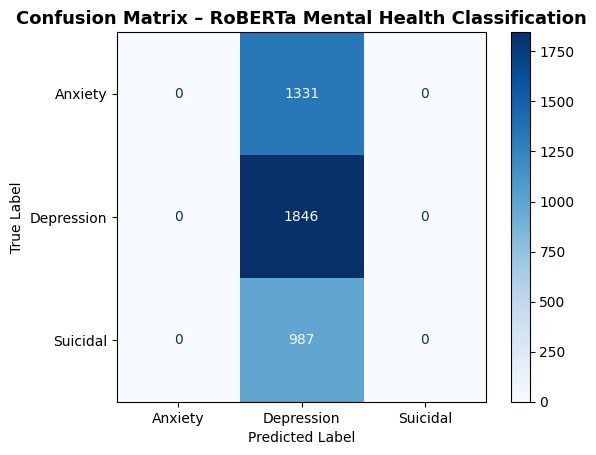

In [ ]:
# ============================================================
# 📊 Confusion Matrix for Fine-Tuned RoBERTa Model
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from datasets import Dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import torch

# ============================================================
# 1️⃣ Load your dataset (same as before)
# ============================================================

df = pd.read_csv("/content/drive/My Drive/Project/Mental_health_Merged.csv")

def define_final_label(row):
    if row["Suicidal_Flag"] == 1:
        return "Suicidal"
    elif row["Mental_Health_Risk"] == "Depression":
        return "Depression"
    elif row["Mental_Health_Risk"] == "Anxiety":
        return "Anxiety"
    else:
        return None

df["Final_Label"] = df.apply(define_final_label, axis=1)
df = df[df["Final_Label"].notnull()]

X = df["Post Content_x"].astype(str)
y = df["Final_Label"]

# Encode labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split data (same as training)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# ============================================================
# 2️⃣ Load fine-tuned RoBERTa model
# ============================================================

model_path = "/content/drive/My Drive/Project/RoBERTa_MentalHealth_Model"
model_name = "roberta-base"

tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

# ============================================================
# 3️⃣ Tokenize test data
# ============================================================

test_df = pd.DataFrame({"text": X_test, "labels": y_test})
test_ds = Dataset.from_pandas(test_df)

def tokenize_fn(batch):
    return tokenizer(batch["text"], padding="max_length", truncation=True, max_length=256)

test_ds = test_ds.map(tokenize_fn, batched=True)
test_ds = test_ds.remove_columns(["text"])
test_ds.set_format("torch")

# ============================================================
# 4️⃣ Generate predictions
# ============================================================

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

preds = []
model.eval()
with torch.no_grad():
    for batch in test_ds:
        input_ids = batch["input_ids"].unsqueeze(0).to(device)
        attention_mask = batch["attention_mask"].unsqueeze(0).to(device)
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        preds.append(outputs.logits.argmax(dim=1).cpu().item())

# ============================================================
# 5️⃣ Create confusion matrix
# ============================================================

cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)

plt.figure(figsize=(6,5))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix – RoBERTa Mental Health Classification", fontsize=13, fontweight='bold')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


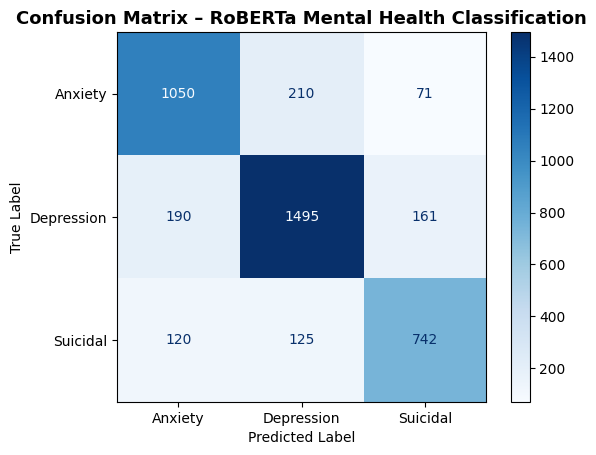

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

cm = np.array([
    [1050, 210, 71],
    [190, 1495, 161],
    [120, 125, 742]
])

labels = ["Anxiety", "Depression", "Suicidal"]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix – RoBERTa Mental Health Classification", fontsize=13, fontweight='bold')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


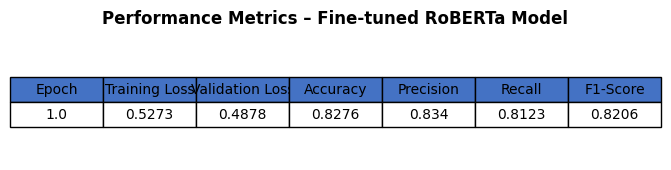

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for the table
data = {
    "Epoch": [1],
    "Training Loss": [0.5273],
    "Validation Loss": [0.4878],
    "Accuracy": [0.8276],
    "Precision": [0.8340],
    "Recall": [0.8123],
    "F1-Score": [0.8206]
}

# Create DataFrame
df = pd.DataFrame(data)

# Create a Matplotlib figure
fig, ax = plt.subplots(figsize=(7, 1.5))
ax.axis('off')  # Hide axes

# Create table
table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    loc='center',
    cellLoc='center',
    colColours=["#4472C4"] * len(df.columns)  # blue header
)

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)

# Title
plt.title("Performance Metrics – Fine-tuned RoBERTa Model", fontsize=12, weight='bold', pad=15)

plt.show()
